# Coursework A

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- Don't use libraries that implement kNN or cross-validation - your code  should be as low-level as possible.  
- For more details, read the coursework PDF

In [2534]:
import numpy as np
import random
#PRESS <Ctrl>+<Enter> to execute this cell

#%matplotlib inline
mySeed=1234567
#initialize random seed generator 
np.random.seed(mySeed)

#In this cell, we load the iris/flower dataset we talked about in class
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X=iris.data
y=iris.target



## 1. Exploratory Data Analysis

Create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels.  The final plot should look similarly to the plot from previous lab notebooks, that is:


<img src="iris_km.png" style="width: 500px">

In [2535]:
def myplotGrid(X,y):
    fig = plt.figure(figsize=(10,10))
    t= 1 
    labels=['petal length','Petal Wideth','Sepal Lenth','Sepal Width']
    for i in range (X.shape[1]):
        for j in range (X.shape[1]):       
            ax = plt.subplot(X.shape[1],X.shape[1],t)
            
            if (i==j and i!=0):
                ax.hist(X[:,i])
                plt.xlabel('Sepal Width')
            elif(i==j and i==0):
                ax.hist(X[:,i])
                plt.ylabel('Petal Length')
            elif(i!=j and j==0):
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)
                plt.xlabel('Petal Length')
                plt.ylabel(labels[i])
            else:
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)
                plt.xlabel(labels[j])
           
               
            t=t+1
       
    return plt.show  


<function matplotlib.pyplot.show(close=None, block=None)>

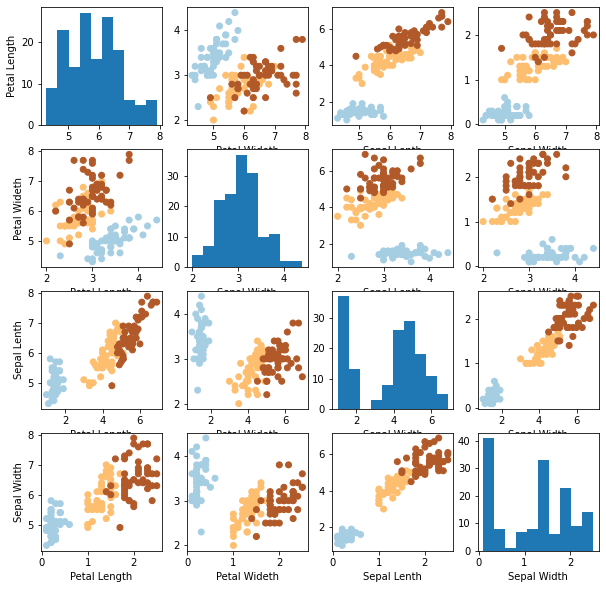

In [2536]:
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

<function matplotlib.pyplot.show(close=None, block=None)>

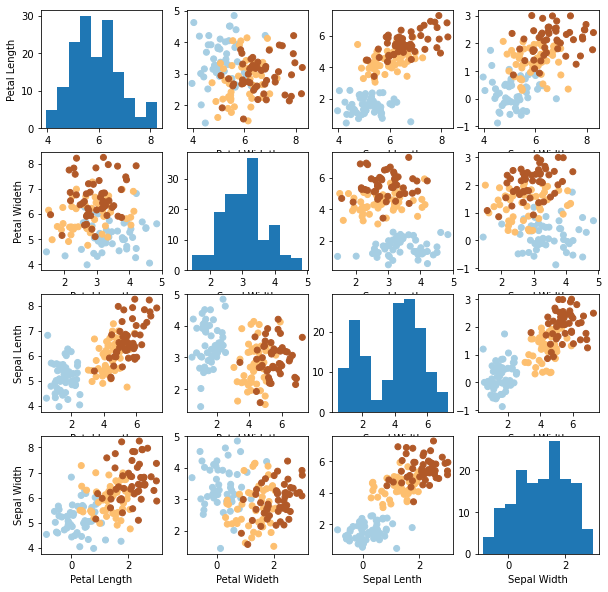

In [2537]:
import numpy as np
mySeed=1234567
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook accompanying the coursework.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

**Note:** if you need help implementing k-NN, you can use Nested Cross-Validation.ipynb

In [2538]:
#Euclidean destance 
def EuclideanDistance(X_train,X_test):
    diff=[X_test[i]-X_train[i] for i in range(len(X_test))]
    dist=np.sqrt(sum([diff[i]**2 for i in range(len(diff))]))
    return dist  


In [2539]:
# Manhattan Distance
def ManhattanDistance(X_train,X_test):
    diff=[X_test[i]-X_train[i] for i in range(len(X_test))]
    dist=sum([abs(diff[i]) for i in range(len(diff))])
    return dist  

In [2540]:
def getNeighbours1(x_,X,n,T): 
    Distance=[EuclideanDistance(X[i],x_) for i in range(T) ]
    indices=[b[0] for b in sorted(enumerate(Distance),key=lambda i:i[1])]
    
    indic_Neigh=[indices[i] for i in range(n)]
    return indic_Neigh


In [2541]:
#Returning indices of n Neighbours
def getNeighbours2(x_,X,n,T): 
    Distance=[ManhattanDistance(X[i],x_) for i in range(T) ]
    indices=[b[0] for b in sorted(enumerate(Distance),key=lambda i:i[1])]
    indic_Neigh=[indices[i] for i in range(n)]
    return indic_Neigh

In [2542]:
import random
def assignLabel(nLabels):
    nlabel=np.array(nLabels)
    unique_lab=list(np.unique(nlabel))
    n_unique=[len(np.where(nlabel==unique_lab[i])[0]) for i in range(len(unique_lab))]
    max_unique=[]
    for i in range(len( n_unique)):
        if (n_unique[i]==max(n_unique)):
            max_unique.append(i)
            ind=random.choice(max_unique)
    
    return unique_lab[ind]      

In [2543]:
#Splitting data into training and testing
#iris_data=[[iris.data[i],iris.target[i]] for i in range(len(iris.data))]
#test_ind=random.sample(range(0,150),30)
#ind=random.sample(range(0,150),150)
#train_ind=list(set(ind)-set(test_ind))
#Train=[iris_data[i] for i in train_ind]
#Test=[iris_data[i] for i in test_ind]
#X_train=[Train[i][0] for i in range(len(Train))]
#X_test=[Test[i][0] for i in range(len(Test))]
#y_train=[Train[i][1] for i in range(len(Train))]
#y_test=[Test[i][1] for i in range(len(Test))]

In [2544]:
def kNNClassifier(X_train,X_test,y_train,n,dist):
    if (dist=='euclidean'):
        n_indices=[getNeighbours1(X_test[i],X_train,n,len(X_train)) for i in range(len(X_test))]
    elif (dist=='manhattan'):
        n_indices=[getNeighbours2(X_test[i],X_train,n,len(X_train)) for i in range(len(X_test))]
    else:
        pass
        
    n_labels=[[y_train[k] for k in n_indices[i]]for i in range(len(n_indices))]
    y_pred=[assignLabel(n_labels[i]) for i in range(len(n_labels)) ]
    return y_pred

In [2545]:
#kNNClassifier(X_train,X_test,y,10,'euclidean')

In [2546]:
#y_test

In [2547]:
def kNNClassifier_score(X_train,X_test,y_test,y_train,n,dist):
    if (dist=='euclidean'):
        n_indices=[getNeighbours1(X_test[i],X_train,n,len(X_train)) for i in range(len(X_test))]
    elif (dist=='manhattan'):
        n_indices=[getNeighbours2(X_test[i],X_train,n,len(X_train)) for i in range(len(X_test))]
    else:
        pass
        
    n_labels=[[y_train[k] for k in n_indices[i]]for i in range(len(n_indices))]
    y_pred=[assignLabel(n_labels[i]) for i in range(len(n_labels)) ]
    #Building accuracy_score
    corr_pred=[]
    for i in range(len(y_pred)):
        if (y_pred[i]==y_test[i]):
            corr_pred.append(i)
        else:
            pass
    accuracy_score=len(corr_pred)/len(y_pred)
    
    
    #Building Confusion matrix
    N_pred_00=[]
    N_pred_01=[]
    N_pred_02=[]
    N_pred_11=[]
    N_pred_10=[]
    N_pred_12=[]
    N_pred_22=[]
    N_pred_20=[]
    N_pred_21=[]
    for i in range(len(y_pred)):
        if   (y_test[i]==0 and y_pred[i]==0):
            N_pred_00.append(i)
        elif (y_test[i]==0 and y_pred[i]==1):
            N_pred_01.append(i)
        elif (y_test[i]==0 and y_pred[i]==2):
            N_pred_02.append(i)
        elif (y_test[i]==1 and y_pred[i]==1):
            N_pred_11.append(i) 
        elif (y_test[i]==1 and y_pred[i]==0):
            N_pred_10.append(i)
        elif (y_test[i]==1 and y_pred[i]==2):
            N_pred_12.append(i)
        elif (y_test[i]==2 and y_pred[i]==2):
            N_pred_22.append(i)
        elif (y_test[i]==2 and y_pred[i]==0):
            N_pred_20.append(i)
        else:
            N_pred_21.append(i)
    confusion_matrix=np.array([[len(N_pred_00),len(N_pred_01),len(N_pred_02)],[len(N_pred_10),len(N_pred_11),len(N_pred_12)],[len(N_pred_20),len(N_pred_21),len(N_pred_22)]])
    
    return confusion_matrix,accuracy_score,

    


In [2548]:
#kNNClassifier_score(15,'euclidean')

In [2549]:
#kNNClassifier_score(10,'manhattan')[1]

## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook accompanying this coursework.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate at least three distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)
 
**Note:** if you need help implementing cv, you can use nested cross-validation.ipynb


In [2550]:
import itertools
import random

In [2551]:
def myNestedCrossVal(X,y,foldK,nns,dist,mySeed):
    np.random.seed(mySeed)
     #Reshuffling data
    indices= np.random.permutation(np.array(X).shape[0])
    X=np.array([X[i] for i in indices])
    y=np.array([y[i] for i in indices])
    accuracy_fold=[]
    accuracy_score=[]
    confusion_matrix=[]
    n_list=[]
    dist_list=[]
    fold_list=[]
    pred=[]
    Y_test=[]
    fold1_dist=[]
    fold2_dist=[]
    fold3_dist=[]
    fold4_dist=[]
    fold5_dist=[]
    fold1_as=[]
    fold2_as=[]
    fold3_as=[]
    fold4_as=[]
    fold5_as=[]
    fold1_n=[]
    fold2_n=[]
    fold3_n=[]
    fold4_n=[]
    fold5_n=[]
    accuracy_score1=[]
    y_valid=[y[i] for i in range(30)]
   #creating 5 folds and splitting data into training, validation and testing.
    X_bins=[[X[i+int(len(X)/foldK)*j] for i in range(int(len(X)/foldK))] for j in range(foldK) ]
    y_bins=[[y[i+int(len(X)/foldK)*j] for i in range(int(len(X)/foldK))] for j in range(foldK) ]
    lst_test_X_bins=[]
    lst_test_y_bins=[]
    lst_valid_X_bins=[]
    lst_valid_y_bins=[]
    lst_train_X_bins=[]
    lst_train_y_bins=[]
    lst_pred_y_bins_e=[]
    test_X_bins=X_bins[4]
    lst_test_X_bins.append(test_X_bins)
    test_y_bins=y_bins[4]
    lst_test_y_bins.append(test_y_bins)
    valid_X_bins=X_bins[0]
    lst_valid_X_bins.append(valid_X_bins)
    valid_y_bins=y_bins[0]
    lst_valid_y_bins.append(valid_y_bins)
    train_ind=[j for j in range(foldK) if (j!=0 and j!=4)]
    train_X=[X_bins[i] for i in train_ind]
    train_y=[y_bins[i] for i in train_ind]
    train_X_bins=list(itertools.chain(*train_X))
    lst_train_X_bins.append(train_X_bins)
    train_y_bins=list(itertools.chain(*train_y))
    lst_train_y_bins.append(train_y_bins)
    for i in range(foldK-1):
        test_X_bins=X_bins[i]
        lst_test_X_bins.append(test_X_bins)
        test_y_bins=y_bins[i]
        lst_test_y_bins.append(test_y_bins)
        valid_X_bins=X_bins[i+1]
        lst_valid_X_bins.append(valid_X_bins)
        valid_y_bins=y_bins[i+1]
        lst_valid_y_bins.append(valid_y_bins)
        train_ind=[j for j in range(foldK) if (j!=i and j!=i+1)]
        train_X=[X_bins[i] for i in train_ind]
        train_y=[y_bins[i] for i in train_ind]
        train_X_bins=list(itertools.chain(*train_X))
        lst_train_X_bins.append(train_X_bins)
        train_y_bins=list(itertools.chain(*train_y))
        lst_train_y_bins.append(train_y_bins)   
    A=[[i,n,d] for i in range(5) for n in nns  for d in dist]
   
                #X_train=lst_train_X_bins[i]
                #X_test=lst_valid_X_bins[i]
                #y_train=lst_train_y_bins[i]
                #y_test=lst_valid_y_bins[i]
    for i in range(len(A)):
                accuracy_score.append(np.round(kNNClassifier_score(lst_train_X_bins[A[i][0]],lst_valid_X_bins[A[i][0]],lst_valid_y_bins[A[i][0]],lst_train_y_bins[A[i][0]],A[i][1],A[i][2])[1],3))
                n_list.append(A[i][1])
                dist_list.append(A[i][2])
                fold_list.append(A[i][0])
    for i in range(len(fold_list)):
        if (fold_list[i]==0):
            fold1_dist.append(dist_list[i])
            fold1_n.append(n_list[i])
            fold1_as.append(accuracy_score[i])
    for i in range(len(fold1_as)):     
        print (fold1_as[i],(fold1_n[i],fold1_dist[i]))
    for i in range(len(fold1_as)):
        if (fold1_as[i]==max(fold1_as)):
            fold1_bestNN=fold1_n[i]
            fold1_bestDist=fold1_dist[i]
            fold1_bestas=fold1_as[i]
                   
    #print(fold1_dist)
            
    opt=['\x1b[6;30;46m' +'** End of fold1 validation, best AS,best NN ,best Dist='+ str([fold1_bestas,fold1_bestNN,fold1_bestDist] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0])
    for i in range(len(fold_list)):
        if (fold_list[i]==1):
            fold2_dist.append(dist_list[i])
            fold2_n.append(n_list[i])
            fold2_as.append(accuracy_score[i])
    for i in range(len(fold1_as)):
        print (fold2_as[i],(fold2_n[i],fold2_dist[i]))
    for i in range(len(fold2_as)):
        if (fold2_as[i]==max(fold2_as)):
            fold2_bestNN=fold2_n[i]
            fold2_bestDist=fold2_dist[i]
            fold2_bestas=fold2_as[i]
                    
            
    opt=['\x1b[6;30;46m' +'** End of fold2 validation, best AS,best NN  ,best Dist='+ str([fold2_bestas,fold2_bestNN,fold2_bestDist] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0]) 
    for i in range(len(fold_list)):
        if (fold_list[i]==2):
            fold3_dist.append(dist_list[i])
            fold3_n.append(n_list[i])
            fold3_as.append(accuracy_score[i])
    for i in range(len(fold1_as)):
        print (fold3_as[i],(fold3_n[i],fold3_dist[i]))
    for i in range(len(fold3_as)):
        if (fold3_as[i]==max(fold3_as)):
            fold3_bestNN=fold3_n[i]
            fold3_bestDist=fold3_dist[i]
            fold3_bestas=fold3_as[i]
                    
            
    opt=['\x1b[6;30;46m' +'** End of fold3 validation,best AS, best NN  ,best Dist='+ str([fold3_bestas,fold3_bestNN,fold3_bestDist] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0])
    for i in range(len(fold_list)):
        if (fold_list[i]==3):
            fold4_dist.append(dist_list[i])
            fold4_n.append(n_list[i])
            fold4_as.append(accuracy_score[i])
    for i in range(len(fold1_as)):
        print (fold4_as[i],(fold4_n[i],fold4_dist[i]))
    for i in range(len(fold4_as)):
        if (fold4_as[i]==max(fold4_as)):
            fold4_bestNN=fold4_n[i]
            fold4_bestDist=fold4_dist[i]
            fold4_bestas=fold4_as[i]
                    
            
    opt=['\x1b[6;30;46m' +'** End of fold4 validation,best AS, best NN  ,best Dist='+ str([fold4_bestas,fold4_bestNN,fold4_bestDist] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0]) 
    
    for i in range(len(fold_list)):
        if (fold_list[i]==4):
            fold5_dist.append(dist_list[i])
            fold5_n.append(n_list[i])
            fold5_as.append(accuracy_score[i])
    for i in range(len(fold1_as)):
        print (fold5_as[i],(fold5_n[i],fold5_dist[i]))
    for i in range(len(fold5_as)):
        if (fold5_as[i]==max(fold5_as)):
            fold5_bestNN=fold5_n[i]
            fold5_bestDist=fold5_dist[i]
            fold5_bestas=fold5_as[i]
    
            
    opt=['\x1b[6;30;46m' +'** End of fold5 validation,best AS, best NN  ,best Dist='+ str([fold5_bestas,fold5_bestNN,fold5_bestDist] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0])   
    #print(fold_list)
    #print(accuracy_score)
    
    l_bestNN=[fold1_bestNN,fold2_bestNN,fold3_bestNN,fold4_bestNN,fold5_bestNN]
    l_bestDist=[fold1_bestDist,fold2_bestDist,fold3_bestDist,fold4_bestDist,fold5_bestDist]
    l_bestas=[fold1_bestas,fold2_bestas,fold3_bestas,fold4_bestas,fold5_bestas]
    
    for i in range(len(l_bestas)):
        if (l_bestas[i]==max(l_bestas)):
            bestDistance= l_bestDist[i]
            bestNN=l_bestNN[i]
            
            
    
    print('Now out of the optimal parameters of the 5 folds, we chose the ones that give the best accuracy as shown below and proceed with cross-validation') 
    
    opt=['\x1b[6;30;43m' +'**  Best NN  ,best Dist='+ str([bestNN,bestDistance] ) + '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
    print(opt[0]) 
    
   
    #print('** End of val, best NN', bestNN, 'best Dist', bestDistance)
    for i in range(len(lst_test_X_bins)):
        X_train=lst_train_X_bins[i]
        y_train=lst_train_y_bins[i]
        X_test=lst_test_X_bins[i]
        y_test=lst_test_y_bins[i]
        Y_test.append(y_test)
        matrix,score=kNNClassifier_score(X_train,X_test,y_test,y_train,bestNN,bestDistance)
        #matrix=kNNClassifier_score(bestNN,bestDistance)
        confusion_matrix.append(matrix)
        accuracy_fold.append(np.round(score,3))
    
    print('Now using the best parameters obtained in validation, here is the score obtained using testing sets in 5 folds')
    accuracy_fold=['\x1b[6;30;42m' +str(accuracy_fold ) + '\x1b[0m' for i in range(5)]
    accuracy_fold=[print(accuracy_fold[i]) for i in range(1)] 
    print('Here is the total Confusion Matrix:')
    print(sum(confusion_matrix))
    
    return accuracy_fold
    

In [2552]:
iris = datasets.load_iris()
X=iris.data
y=iris.target
accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)

0.967 (1, 'euclidean')
0.967 (1, 'manhattan')
0.933 (2, 'euclidean')
0.933 (2, 'manhattan')
0.967 (3, 'euclidean')
0.967 (3, 'manhattan')
0.967 (4, 'euclidean')
0.967 (4, 'manhattan')
0.967 (5, 'euclidean')
0.967 (5, 'manhattan')
0.967 (6, 'euclidean')
0.967 (6, 'manhattan')
0.967 (7, 'euclidean')
0.967 (7, 'manhattan')
0.967 (8, 'euclidean')
0.967 (8, 'manhattan')
0.967 (9, 'euclidean')
0.967 (9, 'manhattan')
0.967 (10, 'euclidean')
0.967 (10, 'manhattan')
** End of fold1 validation, best AS,best NN ,best Dist=[0.967, 10, 'manhattan']
0.933 (1, 'euclidean')
0.933 (1, 'manhattan')
0.933 (2, 'euclidean')
0.967 (2, 'manhattan')
0.967 (3, 'euclidean')
0.967 (3, 'manhattan')
0.967 (4, 'euclidean')
0.967 (4, 'manhattan')
0.933 (5, 'euclidean')
0.933 (5, 'manhattan')
0.933 (6, 'euclidean')
0.933 (6, 'manhattan')
0.933 (7, 'euclidean')
0.933 (7, 'manhattan')
0.9 (8, 'euclidean')
0.9 (8, 'manhattan')
0.933 (9, 'euclidean')
0.933 (9, 'manhattan')
0.933 (10, 'euclidean')
0.933 (10, 'manhattan')


In [2553]:
iris = datasets.load_iris()
X=iris.data
y=iris.target
Xn=X+np.random.normal(0,5,np.array(X).shape)
accuracy_fold=myNestedCrossVal(Xn,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)

0.333 (1, 'euclidean')
0.367 (1, 'manhattan')
0.267 (2, 'euclidean')
0.367 (2, 'manhattan')
0.267 (3, 'euclidean')
0.333 (3, 'manhattan')
0.2 (4, 'euclidean')
0.467 (4, 'manhattan')
0.367 (5, 'euclidean')
0.367 (5, 'manhattan')
0.433 (6, 'euclidean')
0.4 (6, 'manhattan')
0.367 (7, 'euclidean')
0.367 (7, 'manhattan')
0.4 (8, 'euclidean')
0.433 (8, 'manhattan')
0.467 (9, 'euclidean')
0.433 (9, 'manhattan')
0.367 (10, 'euclidean')
0.4 (10, 'manhattan')
** End of fold1 validation, best AS,best NN ,best Dist=[0.467, 9, 'euclidean']
0.333 (1, 'euclidean')
0.333 (1, 'manhattan')
0.233 (2, 'euclidean')
0.233 (2, 'manhattan')
0.233 (3, 'euclidean')
0.4 (3, 'manhattan')
0.333 (4, 'euclidean')
0.333 (4, 'manhattan')
0.233 (5, 'euclidean')
0.333 (5, 'manhattan')
0.3 (6, 'euclidean')
0.2 (6, 'manhattan')
0.267 (7, 'euclidean')
0.267 (7, 'manhattan')
0.2 (8, 'euclidean')
0.267 (8, 'manhattan')
0.133 (9, 'euclidean')
0.233 (9, 'manhattan')
0.2 (10, 'euclidean')
0.2 (10, 'manhattan')
** End of fold2 v

In [2554]:
#Fuction to calculate mean of data in a list X
def mean(X):
    mean=sum(X)/len(X)
    return mean

In [2555]:
#Fuction to calculate standard deviation of data in a list X
def std(X):
    diff=[(X[i]-mean(X))**2 for i in range(len(X)) ]
    std=np.sqrt(sum(
        diff)/(len(X)-1))
    return std
    

In [2556]:
#Clean data
accuracy_clean= [96.7, 96.7, 100, 100, 100]
mean(accuracy_clean)

98.67999999999999

In [2557]:
std(accuracy_clean)

1.8074844397670466

In [2558]:
#Noisy Data
accuracy_noisy= [46.7, 36.7, 53.3, 56.7, 46.7]
mean(accuracy_noisy)


48.019999999999996

In [2559]:
std(accuracy_noisy)

7.662375610735875



## Part 3



In [2560]:
def ManhattanDistance(X_train,X_test):
    dist=[sum(list(abs(X_test-X_train[i]))) for i in range(len(X_train))] 
    return dist  

In [2561]:
X_train=np.array([(2,2),(1,4),(5,5),(5,7),(5,8)])
X_test=np.array((1,1))
y_train=np.array((0,0,1,1,1))

In [2562]:
ManhattanDistance(X_train,X_test)

[2, 3, 8, 10, 11]

# Weighted k-NN

In [2563]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [2564]:
#Euclidean destance 
def EuclideanDistance(X_train,X_test):
    diff=[X_test[i]-X_train[i] for i in range(len(X_test))]
    dist=np.sqrt(sum([diff[i]**2 for i in range(len(diff))]))
    return dist  


In [2565]:
# Manhattan Distance
def ManhattanDistance(X_train,X_test):
    diff=[X_test[i]-X_train[i] for i in range(len(X_test))]
    dist=sum([abs(diff[i]) for i in range(len(diff))])
    return dist  

In [2566]:
def getNeighbours3(x_,X_train,n,T): 
    Distance=[EuclideanDistance(X[i],x_) for i in range(T) ]
    indices=[b[0] for b in sorted(enumerate(Distance),key=lambda i:i[1])]
    indic_Neigh=[indices[i] for i in range(n)]
    return indic_Neigh ,Distance  

In [2567]:
def getNeighbours4(x_,X,n,T): 
    Distance=[ManhattanDistance(X[i],x_) for i in range(T) ]
    indices=[b[0] for b in sorted(enumerate(Distance),key=lambda i:i[1])]
    indic_Neigh=[indices[i] for i in range(n)]
   
    return indic_Neigh, Distance

In [2568]:
import random
def kNNClassifier1(X_train,X_test,y_test,n,dist):
   
    if (dist=='euclidean'):
        n_indices=[getNeighbours3(X_test[i],X_train,n,len(X_train))[0] for i in range(len(X_test))]
        Distance=[getNeighbours3(X_test[i],X_train,n,len(X_train))[1] for i in range(len(X_test))]
    elif (dist=='manhattan'):
        n_indices=[getNeighbours4(X_test[i],X_train,n,len(X_train))[0] for i in range(len(X_test))]
        Distance=[getNeighbours4(X_test[i],X_train,n,len(X_train))[1] for i in range(len(X_test))]
        
    else:
        pass
    return n_indices,Distance

In [2569]:
def kNNClassifier_score1(X_train,X_test,y_test,y_train,n,dist):
    n_indices, Distance=kNNClassifier1(X_train,X_test,y_test,n,dist)
    ind_class_0=[[i for i in n_indices[j] if(y_train[i]==0)] for j in range(len(n_indices))]
    ind_class_1=[[i for i in n_indices[j] if(y_train[i]==1)] for j in range(len(n_indices))]
    ind_class_2=[[i for i in n_indices[j] if(y_train[i]==2)] for j in range(len(n_indices))]
    wd_class_0=[]
    wd_class_1=[]
    wd_class_2=[]
    for k in range(len(ind_class_0)):
        if(len(ind_class_0[k])==0):
            wd_class_0.append(0.000001)
        else:
            wd_class_0.append(sum([1/Distance[k][j] for j in ind_class_0[k]])) 
    for k in range(len(ind_class_1)):
        if(len(ind_class_1[k])==0):
            wd_class_1.append(0.000001)
        else:
            wd_class_1.append(sum([1/Distance[k][j] for j  in ind_class_1[k]]))
    for k in range(len(ind_class_2)):
        if(len(ind_class_2[k])==0):
            wd_class_2.append(0.000001)
        else:
            wd_class_2.append(sum([1/Distance[k][j] for j in   ind_class_2[k]]))
    y_pred=[]    
    for i in range(len( wd_class_0)):
        a=random.choice([0,1])
        b=random.choice([0,2])
        c=random.choice([1,2])
        d=random.choice([0,1,2])
        if ( wd_class_0[i]> wd_class_1[i] and  wd_class_0[i]> wd_class_2[i]):
            y_pred.append(0)
        elif ( wd_class_1[i]> wd_class_0[i] and  wd_class_1[i]> wd_class_2[i]):
            y_pred.append(1)
        elif ( wd_class_2[i]>wd_class_0[i] and  wd_class_2[i]> wd_class_1[i]):
            y_pred.append(2)
        elif ( wd_class_0[i]==wd_class_1[i] and  wd_class_0[i]> wd_class_2[i]):
            y_pred.append(a)
        elif ( wd_class_0[i]==wd_class_2[i] and  wd_class_0[i]> wd_class_1[i]):
            y_pred.append(b)
        elif ( wd_class_1[i]==wd_class_2[i] and  wd_class_1[i]> wd_class_0[i]):
            y_pred.append(c)
        else:
            y_pred.append(d)
        
    corr_pred=[]
    for i in range(len(y_pred)):
        if (y_pred[i]==y_test[i]):
            corr_pred.append(i)
        else:
            pass
    accuracy_score=len(corr_pred)/len(y_pred)
#Building Confusion matrix
    N_pred_00=[]
    N_pred_01=[]
    N_pred_02=[]
    N_pred_11=[]
    N_pred_10=[]
    N_pred_12=[]
    N_pred_22=[]
    N_pred_20=[]
    N_pred_21=[]
    for i in range(len(y_pred)):
        if   (y_test[i]==0 and y_pred[i]==0):
            N_pred_00.append(i)
        elif (y_test[i]==0 and y_pred[i]==1):
            N_pred_01.append(i)
        elif (y_test[i]==0 and y_pred[i]==2):
            N_pred_02.append(i)
        elif (y_test[i]==1 and y_pred[i]==1):
            N_pred_11.append(i) 
        elif (y_test[i]==1 and y_pred[i]==0):
            N_pred_10.append(i)
        elif (y_test[i]==1 and y_pred[i]==2):
            N_pred_12.append(i)
        elif (y_test[i]==2 and y_pred[i]==2):
            N_pred_22.append(i)
        elif (y_test[i]==2 and y_pred[i]==0):
            N_pred_20.append(i)
        else:
            N_pred_21.append(i)
    confusion_matrix=np.array([[len(N_pred_00),len(N_pred_01),len(N_pred_02)],[len(N_pred_10),len(N_pred_11),len(N_pred_12)],[len(N_pred_20),len(N_pred_21),len(N_pred_22)]])
    
    return confusion_matrix, accuracy_score

    


##  Testing our  Weighted k-NN with Clean data

Note that we are using the best parameters found for clean data after running cross validation of k-NN. So our n=10 and distance is Euclidean.

In [2584]:
from sklearn import datasets
import random
iris = datasets.load_iris()
X=iris.data
y=iris.target
indices= np.random.permutation(np.array(X).shape[0])
X=np.array([X[i] for i in indices])
y=np.array([y[i] for i in indices])
X_train_c=[X[i] for i in range(120)]
X_test_c=[X[i] for i in range(120,150)]
y_train_c=[y[i] for i in range(120)]
y_test_c=[y[i] for i in range(120,150)]



kNNClassifier_score1(X_train_c,X_test_c,y_test_c,y_train_c,10,'euclidean')

<ipython-input-2569-a9859d259743>:23: RuntimeWarning: divide by zero encountered in double_scalars
  wd_class_2.append(sum([1/Distance[k][j] for j in   ind_class_2[k]]))


(array([[ 8,  0,  0],
        [ 0, 12,  0],
        [ 0,  0, 10]]),
 1.0)

##  Testing our  Weighted k-NN with Noisy data

For noisy data our best parameters as obtained from cross validation is n=10 and distance is manhattan
  

In [2586]:
from sklearn import datasets
import random
iris = datasets.load_iris()
X=iris.data
y=iris.target
Xn=X+np.random.normal(10,30,np.array(X).shape)
y=iris.target
indices= np.random.permutation(np.array(X).shape[0])
Xn=np.array([X[i] for i in indices])
y=np.array([y[i] for i in indices])
X_train_n=[Xn[i] for i in range(120)]
X_test_n=[Xn[i] for i in range(120,150)]
y_train_n=[y[i] for i in range(120)]
y_test_n=[y[i] for i in range(120,150)]

kNNClassifier_score1(X_train_n,X_test_n,y_test_n,y_train_n,10,'manhattan')

(array([[ 9,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  8]]),
 0.9666666666666667)